# Predictive models for diagnosis of diabetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import statsmodels.api as sm
import statsmodels.discrete as discrete
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
### Names of columns i.e. features & outcome
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
type(diabetes)
diabetes.shape
###### The dataset consists of 768 observations, with 9 features each
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Outcome
No diagnosis of diabetes = 0 <br>
Diabetes diagnosis = 1    <br>
Stratify by the "Outcome" column values and count the rows in each subset

In [7]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

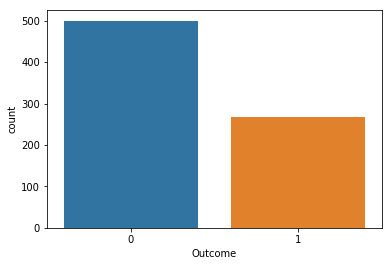

In [8]:
sns.countplot(diabetes['Outcome'],label="Count")

#### Summary of dataset & variables

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Scatter plots: features and outcome

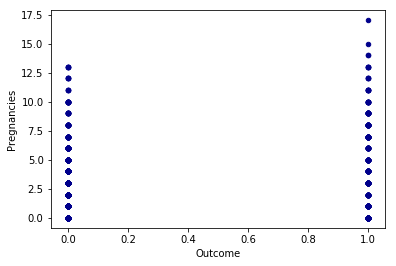

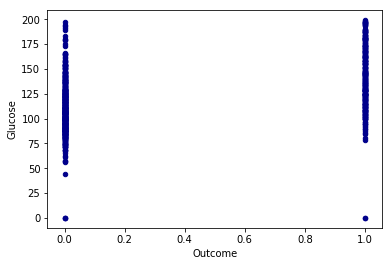

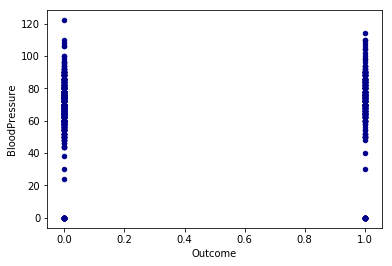

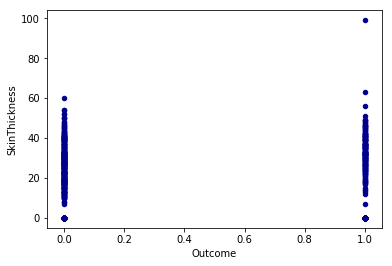

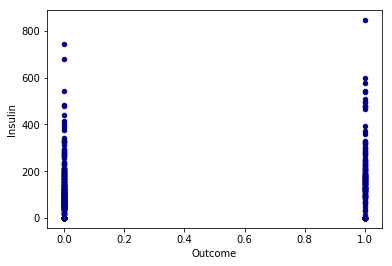

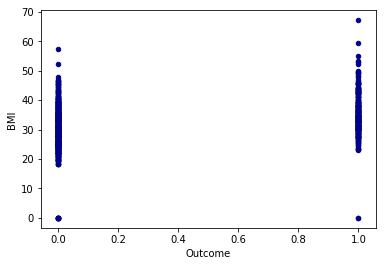

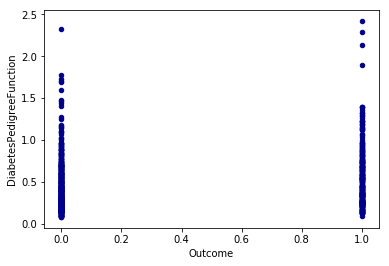

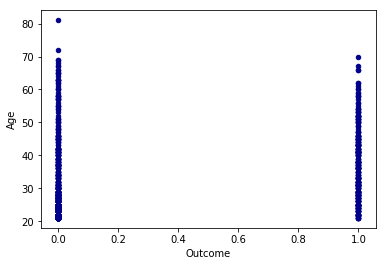

In [10]:
predictors = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
for predictor in predictors:
    ax1 = diabetes.plot.scatter(x= 'Outcome',
        y=predictor,
        c='DarkBlue')


### Fit a multivariate logistic regression model to view coefficients

In [11]:
#### Create data frames
X = diabetes.loc[:, diabetes.columns != 'Outcome']
y = diabetes['Outcome']

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

'''
Note: code for a linear regression model
model = sm.OLS(y, X).fit()       # fit the model
'''

#### Logit model
model = discrete.discrete_model.Logit(y, X).fit() 
predictions = model.predict(X)   # make predictions (illustrative only - will instead use scikit for prediction)

# Print out the statistics
model.summary()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Wed, 18 Jul 2018   Pseudo R-squ.:                  0.2718
Time:                        12:00:56   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

### k-Nearest Neighbors

In [12]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=1)

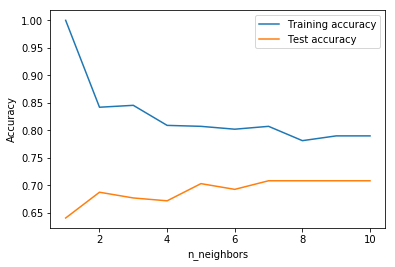

In [13]:


training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
n_neighbors_range = range(1, 11)

for n_neighbors in n_neighbors_range:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(n_neighbors_range, training_accuracy, label="Training accuracy")
plt.plot(n_neighbors_range, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex.
The best performance is somewhere around 9 neighbors.

The above plot suggests that we should choose n_neighbors=9. Here we are:

In [14]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.71


### Logistic Regression

#### Gridsearch

In [15]:
pipe_logistic = Pipeline([('scl', StandardScaler()),
                         ('clf', LogisticRegression(random_state=1))])

#### C - regularisation parameter - check a range of values
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

#### Note: There should be two underscores between estimator name and its parameters in a Pipeline
####    i.e. clf__C works fine, but clf_C does not work.
param_grid  = [{'clf__C': param_range}]


gs = GridSearchCV(estimator = pipe_logistic,
                 param_grid = param_grid,
                 scoring = 'accuracy',
                 cv=10,
                 n_jobs = -1)
gs = gs.fit(X_train, y_train)
print("Best Score {}".format(gs.best_score_))
print("Best parameters {}".format(gs.best_params_))

Best Score 0.7708333333333334
Best parameters {'clf__C': 0.1}


C = "Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization." <br>
Scikit-learn offers a default value of C=1 <br>
This achieves 77% accuracy on training and 75% accuracy on test set.

#### C = 1

In [16]:
#### Fit the model on training data
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))

#### Evaluate the model on test data
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.774
Test set accuracy: 0.750


Using C=0.01 results in lower accuracy on both the training and the test sets.

The optimal hyperparameter setting is C = 5 or C = 10.

Finally, let’s look at the coefficients learned by the models with the different settings of the regularization parameter C.

Stronger regularization (C=0.01) pushes coefficients towards zero. For the feature “DiabetesPedigreeFunction”, for all values of 'C', the coefficient is positive. i.e. high values of “DiabetesPedigreeFunction” are associated with increased likelihood of a sample being “diabetes”. <br>
The coefficients of other features are closer to zero.

In [17]:
logreg     = LogisticRegression(C=1).fit(X_train, y_train)
logreg01   = LogisticRegression(C=0.1).fit(X_train, y_train)
logreg001  = LogisticRegression(C=0.01).fit(X_train, y_train)
logreg0001 = LogisticRegression(C=0.001).fit(X_train, y_train)
logreg10   = LogisticRegression(C=10).fit(X_train, y_train)
logreg100  = LogisticRegression(C=100).fit(X_train, y_train)


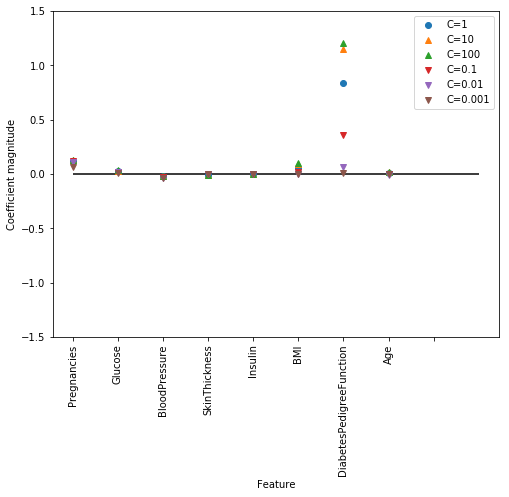

In [18]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]

plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg10.coef_.T, '^', label="C=10")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg01.coef_.T, 'v', label="C=0.1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.plot(logreg0001.coef_.T, 'v', label="C=0.001")

plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-1.5, 1.5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

### Decision Tree

In [19]:


tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.740


The accuracy on the training set is 100%, while the test set accuracy is much worse. This indicates that the decision tree is  overfitting and does not generalise well to new data. Accordingly, we should pre-prune the tree.

Limiting the depth of the tree decreases overfitting. Set max_depth=4,  This lowers accuracy on the training set, but improves the test set accuracy.

In [20]:
tree_4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_4.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree_4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_4.score(X_test, y_test)))

Accuracy on training set: 0.800
Accuracy on test set: 0.755


Set max_depth=3. This further lowers accuracy on the training set, but improves accuracy again on the test set.

In [21]:
tree_3 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_3.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree_3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_3.score(X_test, y_test)))

Accuracy on training set: 0.785
Accuracy on test set: 0.760


Set max_depth=2. This reduces accuracy on both the training and test datasets.

In [22]:
tree_2 = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree_2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_2.score(X_test, y_test)))

Accuracy on training set: 0.781
Accuracy on test set: 0.745


### Feature importance in Decision trees
Feature importance indicates the importance of each feature in a decision tree. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1 across all the features.

In [23]:
print("Feature importances:\n{}".format(tree.feature_importances_))
print("Feature importances:\n{}".format(tree_4.feature_importances_))
print("Feature importances:\n{}".format(tree_3.feature_importances_))
print("Feature importances:\n{}".format(tree_2.feature_importances_))

Feature importances:
[0.0559344  0.31629915 0.09450614 0.03281417 0.06932079 0.18154518
 0.13875996 0.11082021]
Feature importances:
[0.01500789 0.58690462 0.04628255 0.01136015 0.         0.20379752
 0.01785618 0.11879109]
Feature importances:
[0.         0.69541162 0.         0.         0.         0.18563717
 0.         0.1189512 ]
Feature importances:
[0.         0.65990828 0.         0.         0.         0.19654293
 0.         0.14354878]


#### Visualize the feature importance.

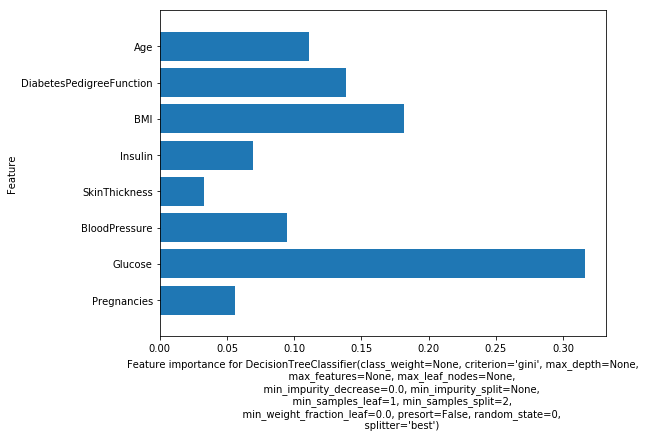

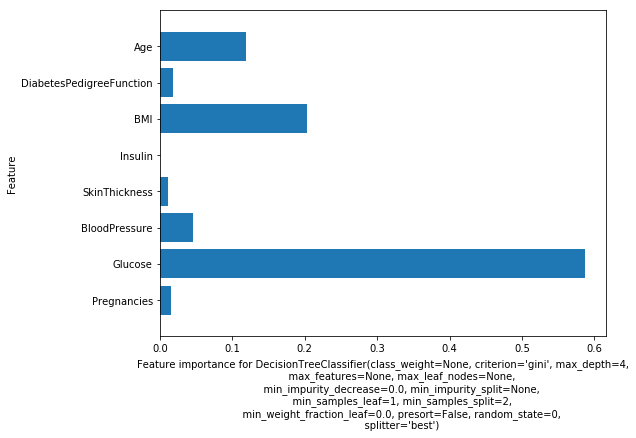

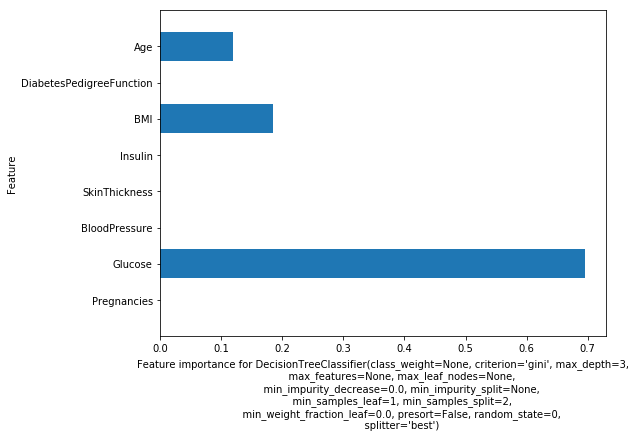

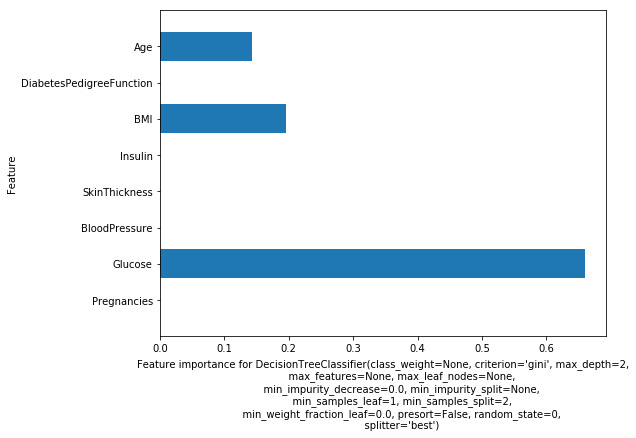

In [24]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance for {}".format(model))
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

plot_feature_importances_diabetes(tree_4)
plt.savefig('feature_importance_4')

plot_feature_importances_diabetes(tree_3)
plt.savefig('feature_importance_3')

plot_feature_importances_diabetes(tree_2)
plt.savefig('feature_importance_2')

"Glucose" is the most important feature.

### Random Forest

let’s apply a random forest consisting of 100 trees on the diabetes dataset:

In [25]:


rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.750


The random forest gives us an accuracy of 78.6%, better than the logistic regression model or a single decision tree, without tuning any parameters. However, we can adjust the max_features setting, to see whether the result can be improved.

In [26]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.806
Accuracy on test set: 0.740


It did not, this indicates that the default parameters of the random forest work well.

### Feature importance in Random Forest

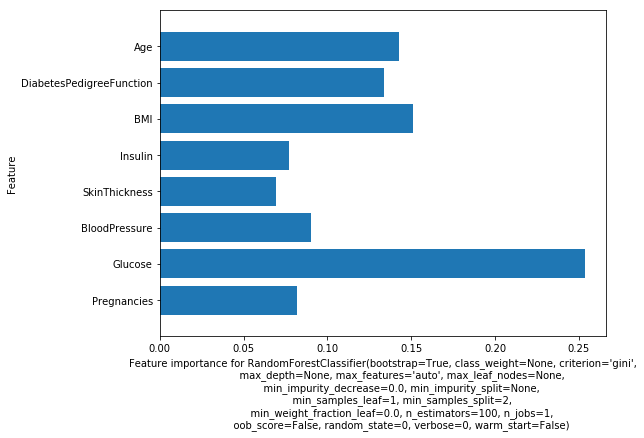

In [27]:
plot_feature_importances_diabetes(rf)

Similarly to the single decision tree, the random forest also gives a lot of importance to the “Glucose” feature, but it also chooses “BMI” to be the 2nd most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.

### Gradient Boosting

In [28]:


gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.913
Accuracy on test set: 0.745


We are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [29]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.818
Accuracy on test set: 0.734


In [30]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.807
Accuracy on test set: 0.740


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. In this case, none of these methods increased the generalization performance of the test set.

We can visualize the feature importances to get more insight into our model even though we are not really happy with the model.

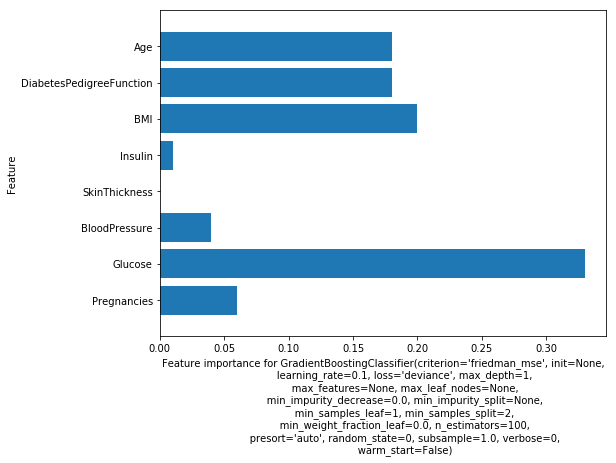

In [31]:
plot_feature_importances_diabetes(gb1)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, it gives weight to all of the features in this case.

### Support Vector Machine

In [32]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                         ('clf', SVC(random_state=1))])

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

#### Note: There should be two underscores between estimator name and its parameters in a Pipeline
####    i.e. clf__C works fine, but clf_C does not work.
param_grid  = [{'clf__C': param_range,
               'clf__kernel': ['linear']},
              {'clf__C': param_range,
              'clf__gamma': param_range,
              'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator = pipe_svc,
                 param_grid = param_grid,
                 scoring = 'accuracy',
                 cv=10,
                 n_jobs = -1)
gs = gs.fit(X_train, y_train)
print("Best Score {}".format(gs.best_score_))
print("Best parameters {}".format(gs.best_params_))

Best Score 0.7881944444444444
Best parameters {'clf__C': 1.0, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}


In [33]:


svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.65


The model overfits quite substantially, with a perfect score on the training set and only 65% accuracy on the test set.

SVM requires all the features to vary on a similar scale. We will need to rescale our data that all the features are approximately on the same scale:

In [34]:


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.73


Scaling the data made a huge difference! Now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model.

In [35]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.818
Accuracy on test set: 0.708


Here, increasing C allows us to improve the model, resulting in 79.7% test set accuracy.

### Neural Networks

In [36]:


mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.73
Accuracy on test set: 0.65


The accuracy of the MLP is not as good as the other models at all, this is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements.

In [37]:



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.845
Accuracy on test set: 0.740


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scaling has improved the results. This is the highest test accuracy so far.

In [38]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.931
Accuracy on test set: 0.724


In [39]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.826
Accuracy on test set: 0.755


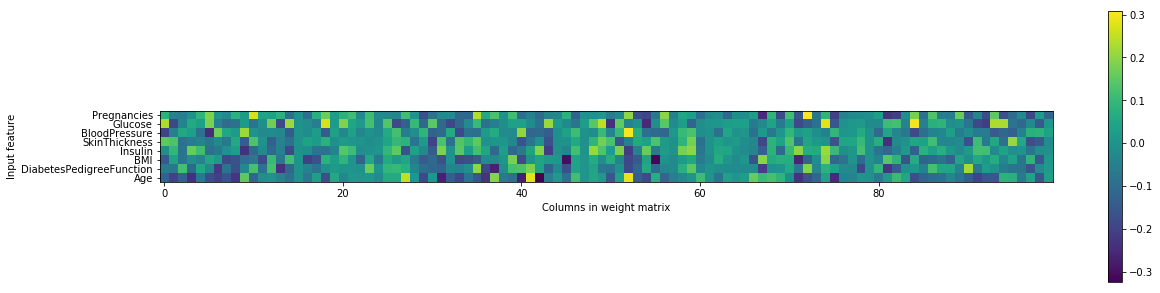

In [40]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

From the heat map, it is not quickly evident which feature(s) have low weights relative to the other features.